## 상관관계
- 두 변수간 관계성 강도 측정 통계지표
- -1 < 0 < 1(기준 : 0.5)
    * 1 : 양의 관계로 깊다
    * 0 : 관계 없다
    * -1 : 음의 관계로 있다

### 간단한 예제

In [35]:
import pandas as pd

In [36]:
# 두 변수 데이터 (예: 주식 A와 주식 B의 일간 수익률) 
data = { 'Stock_A': [0.02, 0.01, -0.01, 0.03, -0.02]
        , 'Stock_B': [0.01, 0.03, -0.02, 0.04, -0.01] 
        }

df_first = pd.DataFrame(data)
df_first

,Stock_A,Stock_B
0,0.02,0.01
1,0.01,0.03
2,-0.01,-0.02
3,0.03,0.04
4,-0.02,-0.01


In [37]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Stock_A  5 non-null      float64
 1   Stock_B  5 non-null      float64
dtypes: float64(2)
memory usage: 212.0 bytes


In [38]:
df_first.corr()

,Stock_A,Stock_B
Stock_A,1.00000,0.85118
Stock_B,0.85118,1.00000


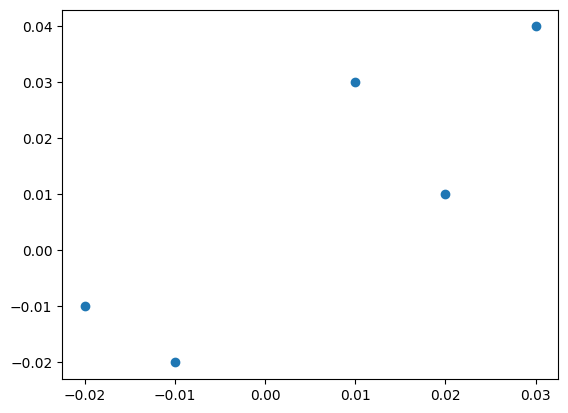

In [39]:
import matplotlib.pyplot as plt

plt.scatter(df_first['Stock_A'], df_first['Stock_B'])
plt.show()

### 실 주식 데이터 상관관계 확인

In [40]:
# 개별 종목 데이터: 국내외 심볼 혼합 
stocks = {
    'S&P500': 'S&P500' # S&P500 지수 (미국)
    ,'AAPL': 'Apple (US)' # 애플 (미국)
    ,'MSFT': 'Microsoft (US)' # 마이크로소프트 (미국)
    ,'005930': 'Samsung (KR)' # 삼성전자 (한국)
    ,'000660': 'SK Hynix (KR)'   # SK하이닉스 (한국) 
}

In [41]:
import FinanceDataReader as fdr

In [42]:
start_day = '2023'
df_sp500 = fdr.DataReader('S&P500', start_day)
df_msft = fdr.DataReader('MSFT', start_day)
df_skhynix = fdr.DataReader('000660', start_day)



In [43]:
#df_sp500.info()
# df_msft.info()
#df_skhynix.info()

In [44]:
#df_sp500[['Close']]    #Dataframe
df_sp500_close = df_sp500[['Close']].rename(columns={'Close':'SP500'})

In [45]:
df_msft_close = df_msft[['Close']].rename(columns={'Close':'MSFT'})

In [46]:
df_skhynix_close = df_skhynix[['Close']].rename(columns={'Close':'SKHynix'})

In [47]:
df_corr = pd.concat([df_sp500_close, df_msft_close, df_skhynix_close], axis=1)  
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 516 entries, 2023-01-02 to 2024-12-27
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SP500    499 non-null    float64
 1   MSFT     499 non-null    float64
 2   SKHynix  488 non-null    float64
dtypes: float64(3)
memory usage: 16.1 KB


In [48]:
df_corr.dropna(inplace=True)

In [49]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 471 entries, 2023-01-03 to 2024-12-26
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SP500    471 non-null    float64
 1   MSFT     471 non-null    float64
 2   SKHynix  471 non-null    float64
dtypes: float64(3)
memory usage: 14.7 KB


In [50]:
df_corr.corr()

,SP500,MSFT,SKHynix
SP500,1.00000,0.912200,0.889020
MSFT,0.91220,1.000000,0.920752
SKHynix,0.88902,0.920752,1.000000


In [ ]:
df_samsung = fdr.DataReadr

In [51]:
correlation_matrix = df_corr.corr()
correlation_matrix

,SP500,MSFT,SKHynix
SP500,1.00000,0.912200,0.889020
MSFT,0.91220,1.000000,0.920752
SKHynix,0.88902,0.920752,1.000000


In [52]:
import seaborn as sns

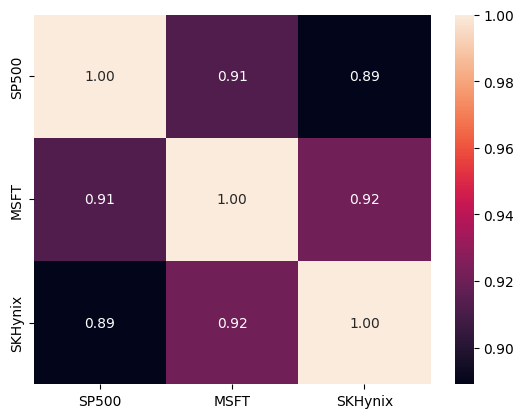

In [56]:
sns.heatmap(correlation_matrix, annot=True, fmt= '.2f',)
plt.show()